In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# Resize all images to 224 * 224 pixels
IMAGE_SIZE = [224, 224]

In [4]:
train_data_path = 'xray_dataset/train'
test_data_path = 'xray_dataset/test'
val_data_path = 'xray_dataset/val'

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# Do not train existing weights, they already derive from 'imagenet'
for layer in vgg.layers:
    layer.trainable = False

In [6]:
# For getting number of classes, aka Normal and Pneumonia
folders = glob('xray_dataset/train/*')
folders

['xray_dataset/train/NORMAL', 'xray_dataset/train/PNEUMONIA']

In [13]:
# Layers
x = Flatten()(vgg.output)

Tensor("block5_pool/MaxPool:0", shape=(None, 7, 7, 512), dtype=float32)
Tensor("flatten_5/Reshape:0", shape=(None, None), dtype=float32)


In [8]:
prediction = Dense(len(folders), activation='softmax')(x)
prediction

<tf.Tensor 'dense_1/Softmax:0' shape=(None, 2) dtype=float32>

In [18]:
model = Model(inputs=vgg.input, outputs=prediction)
print(model.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [19]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [21]:
train_dataGen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_dataGen = ImageDataGenerator(rescale=1./255)

training_set = train_dataGen.flow_from_directory('xray_dataset/train',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')
test_set = test_dataGen.flow_from_directory('xray_dataset/train',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [22]:
# Fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 1056s 6s/step - loss: 0.2133 - accuracy: 0.9210 - val_loss: 0.0574 - val_accuracy: 0.9574
Epoch 2/5
163/163 [==============================] - 1040s 6s/step - loss: 0.1124 - accuracy: 0.9561 - val_loss: 0.2410 - val_accuracy: 0.9371
Epoch 3/5
163/163 [==============================] - 1031s 6s/step - loss: 0.0789 - accuracy: 0.9699 - val_loss: 0.1084 - val_accuracy: 0.9739
Epoch 4/5
163/163 [==============================] - 1019s 6s/step - loss: 0.0858 - accuracy: 0.9666 - val_loss: 0.0852 - val_accuracy: 0.9760
Epoch 5/5
163/163 [==============================] - 1022s 6s/step - loss: 0.0748 - accuracy: 0.9716 - val_loss: 0.3134 - val_accuracy: 0.9603


In [23]:
import tensorflow as tf

from keras.models import load_model

In [24]:
model.save('vgg19.h5')

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


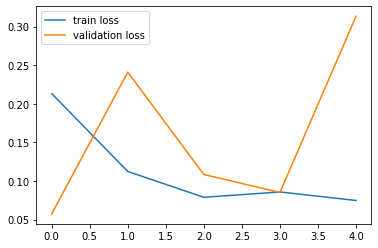

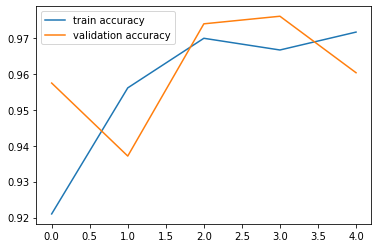

<Figure size 432x288 with 0 Axes>

In [32]:
print(r.history.keys())

# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossValidation_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [38]:
model.get_config()

{'name': 'model_6',
 'layers': [{'name': 'input_1',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_1'},
   'inbound_nodes': []},
  {'name': 'block1_conv1',
   'class_name': 'Conv2D',
   'config': {'name': 'block1_conv1',
    'trainable': False,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'inbound_nodes': [[['input_1'